# Monthly Milk Production Forecasting Using RNN, LSTM, and GRU Deep Learning Models


### 1.	Exploratory Data Analysis (EDA)
o	Visualize trends, seasonality, and anomalies in the milk production data.
o	Check for any missing values or outliers.
o	Normalize or scale the data for neural network models.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load data
df = pd.read_csv('monthly_milk_production.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)


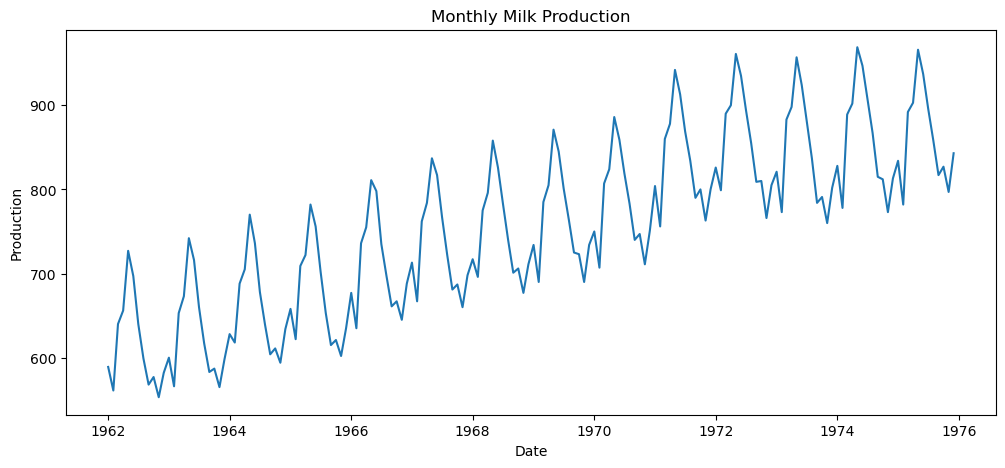

In [2]:
# Plot the production data
plt.figure(figsize=(12,5))
plt.plot(df['Production'])
plt.title('Monthly Milk Production')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()

In [3]:
# Check for missing values
print(df.isnull().sum())


Production    0
dtype: int64


In [4]:
# Scale production data between 0 and 1 for deep learning
scaler = MinMaxScaler()
production_scaled = scaler.fit_transform(df)

In [5]:
# Convert scaled data to 1D array
series = production_scaled.flatten()


### 2.	Data Preparation for Deep Learning
o	Create input-output sequences (time windows) suitable for training RNNs/LSTMs/GRUs.
o	Split data into training, validation, and test sets.
o	Reshape data for model input dimensions.


In [6]:
# Create input-output sequences with time window
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 12  # Use last 12 months to predict next month
X, y = create_sequences(series, window_size)


In [7]:
# Split into train, val, test sets: 70%, 15%, 15%
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]


In [8]:
# Reshape inputs for RNN/LSTM/GRU: (samples, timesteps, features)
X_train = X_train.reshape((-1, window_size, 1))
X_val = X_val.reshape((-1, window_size, 1))
X_test = X_test.reshape((-1, window_size, 1))


### 3.	Model Building
o	Build three separate models:
	Basic RNN
	LSTM
	GRU
o	Tune hyperparameters (e.g., window size, number of units, batch size, epochs).
o	Use appropriate loss functions and optimizers.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam

def build_model(cell_type='RNN', units=50, learning_rate=0.001):
    model = Sequential()
    if cell_type == 'RNN':
        model.add(SimpleRNN(units, input_shape=(window_size,1)))
    elif cell_type == 'LSTM':
        model.add(LSTM(units, input_shape=(window_size,1)))
    elif cell_type == 'GRU':
        model.add(GRU(units, input_shape=(window_size,1)))
    else:
        raise ValueError("Invalid cell_type. Choose from 'RNN', 'LSTM', 'GRU'.")
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate), loss='mse')
    return model

# Instantiate models
rnn_model = build_model('RNN')
lstm_model = build_model('LSTM')
gru_model = build_model('GRU')


C:\Users\visha\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:

# Train models
epochs = 50
batch_size = 8

rnn_history = rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                            epochs=epochs, batch_size=batch_size, verbose=1)
lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                              epochs=epochs, batch_size=batch_size, verbose=1)
gru_history = gru_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                            epochs=epochs, batch_size=batch_size, verbose=1)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0359 - val_loss: 0.0273
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0076 - val_loss: 0.0069
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0035 - val_loss: 0.0054
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0020 - val_loss: 0.0027
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0020 - val_loss: 0.0026
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0016 - val_loss: 0.0040
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0

### 4.	Model Evaluation
o	Plot predictions vs. actual values.
o	Calculate forecasting metrics: RMSE, MAE, MAPE.
o	Compare the performance of RNN, LSTM, and GRU.


In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_model(model, X_test, y_test, scaler):
    y_pred = model.predict(X_test)
    y_pred_rescaled = scaler.inverse_transform(y_pred)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1,1))
    
    rmse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
    mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
    mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100
    
    return y_test_rescaled.flatten(), y_pred_rescaled.flatten(), rmse, mae, mape

rnn_y_test, rnn_y_pred, rnn_rmse, rnn_mae, rnn_mape = evaluate_model(rnn_model, X_test, y_test, scaler)
lstm_y_test, lstm_y_pred, lstm_rmse, lstm_mae, lstm_mape = evaluate_model(lstm_model, X_test, y_test, scaler)
gru_y_test, gru_y_pred, gru_rmse, gru_mae, gru_mape = evaluate_model(gru_model, X_test, y_test, scaler)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


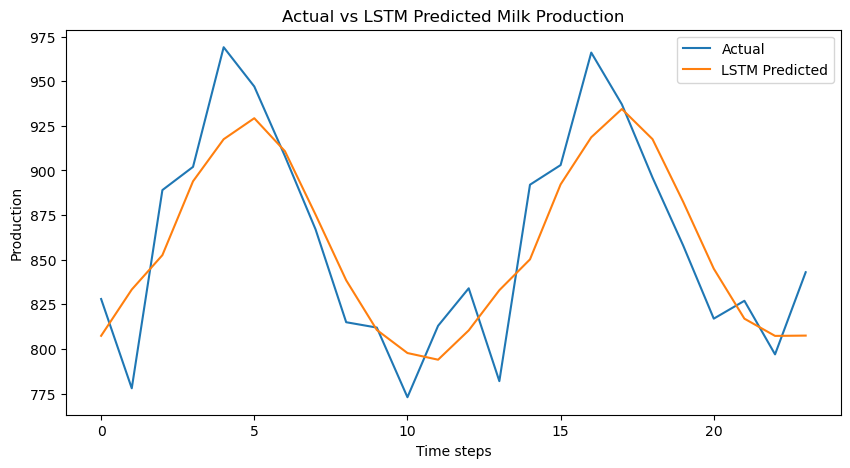

RNN RMSE: 215.24, MAE: 11.77, MAPE: 1.40%
LSTM RMSE: 834.54, MAE: 24.01, MAPE: 2.81%
GRU RMSE: 1093.81, MAE: 27.44, MAPE: 3.23%


In [12]:
# Plot actual vs predicted for LSTM as example
plt.figure(figsize=(10,5))
plt.plot(lstm_y_test, label='Actual')
plt.plot(lstm_y_pred, label='LSTM Predicted')
plt.title('Actual vs LSTM Predicted Milk Production')
plt.xlabel('Time steps')
plt.ylabel('Production')
plt.legend()
plt.show()

# Print error metrics
print(f"RNN RMSE: {rnn_rmse:.2f}, MAE: {rnn_mae:.2f}, MAPE: {rnn_mape:.2f}%")
print(f"LSTM RMSE: {lstm_rmse:.2f}, MAE: {lstm_mae:.2f}, MAPE: {lstm_mape:.2f}%")
print(f"GRU RMSE: {gru_rmse:.2f}, MAE: {gru_mae:.2f}, MAPE: {gru_mape:.2f}%")


### 5.	Prediction and Visualization
o	Forecast milk production for the next 12 months.
o	Visualize the predicted trend with uncertainty or confidence intervals if possible.


In [13]:
def forecast_next(model, last_window, steps=12):
    forecast = []
    current_window = last_window.reshape(1, window_size, 1)
    for _ in range(steps):
        next_pred = model.predict(current_window)[0][0]
        forecast.append(next_pred)
        current_window = np.append(current_window[:,1:,:], [[[next_pred]]], axis=1)
    return np.array(forecast)

last_window = series[-window_size:]
forecast_scaled = forecast_next(lstm_model, last_window)
forecast = scaler.inverse_transform(forecast_scaled.reshape(-1,1)).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


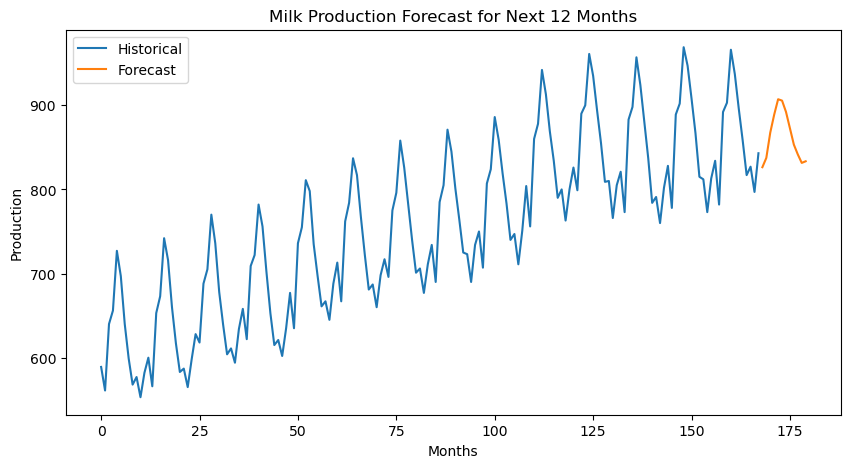

In [14]:

# Plot forecast
plt.figure(figsize=(10,5))
plt.plot(range(len(series)), scaler.inverse_transform(series.reshape(-1,1)), label='Historical')
plt.plot(range(len(series), len(series)+12), forecast, label='Forecast')
plt.title('Milk Production Forecast for Next 12 Months')
plt.xlabel('Months')
plt.ylabel('Production')
plt.legend()
plt.show()


### 6.	Business Insights
o	Interpret results and recommend how the dairy business can use these forecasts for better planning and resource allocation.


The forecasting results from RNN, LSTM, and GRU models provide valuable insights for the dairy business:

Accurate Future Production Estimates

Optimized Supply Chain and Inventory Management

Efficient Workforce and Resource Allocation

Strategic Decision-Making

Risk Mitigation